## EDA - analyse new search

In [1]:
import os
os.chdir('../')
from scripts.post_processing import *
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (7,4)

In [3]:
df = pd.read_csv("output_log/test_s6_21_06_full.txt", sep=" ", header=None)

In [4]:
cols = [
    "path",
    "id",
    "signal",
    "snr",
    "time",
    "asym_score",
    "width1",
    "width2",
    "duration",
    "depth",
    "peak_lspower",
    "mstat",
    "skewness",
    "skewness_err",
    "m",
    "n",
    "chisquare",
    "transit_prob",
]
df.columns = cols

In [5]:
df.head()

,path,id,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_err,m,n,chisquare,transit_prob
0,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,151108417,-20.712526,-17.956760,1473.391644,-3.0,-3.0,-3.0,0.041666,-3.0,0.011050,0.217,-3.0,-3.0,2,210,-38.116166,noModelFitted
1,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,232154847,-4.890364,-3.704332,1489.141198,-2.0,-2.0,-2.0,0.749993,-2.0,0.022327,0.014,-2.0,-2.0,36,966,-338.708147,end
2,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,120885904,-10.040622,-2.920789,1487.495112,-2.0,-2.0,-2.0,1.208348,-2.0,0.166406,0.148,-2.0,-2.0,58,887,-16.540661,end
3,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,434317996,-11.753521,-11.758562,1483.870733,-3.0,-3.0,-3.0,0.020833,-3.0,0.093684,0.088,-3.0,-3.0,1,713,-76.949142,noModelFitted
4,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,60520698,-11.933435,-17.388194,1489.910717,-2.0,-2.0,-2.0,0.020833,-2.0,0.016866,0.140,-2.0,-2.0,1,1003,-73.382480,end


---

### Cleaning data
- Removing any already classified non-transits from `classify` function.

In [12]:
data = df.loc[df.transit_prob == 'maybeTransit']
len(data)

74359

**Throwing away the bad lightcurves**
- We found out that the lightcurves with abnormally large dips that are not present in other pipelines occur in multiple sectors, and they occur around the same time.
- I will remove all those lightcurves eg: with a duration of less than 0.1 anyway.

---

### Exploring trends and distributions

(-4.0, 4.0)

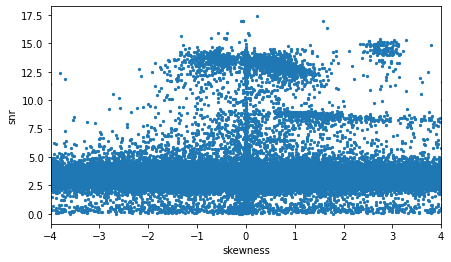

In [13]:
plt.scatter(data.skewness, abs(data.snr), s=5)
plt.xlabel("skewness")
plt.ylabel("snr")
plt.xlim([-4,4])

(0.0, 5.0)

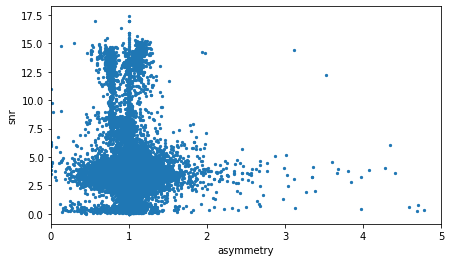

In [14]:
plt.scatter(data.asym_score, abs(data.snr), s=5)
plt.xlabel("asymmetry")
plt.ylabel("snr")
plt.xlim([0,5])

#### Correlation Matrix

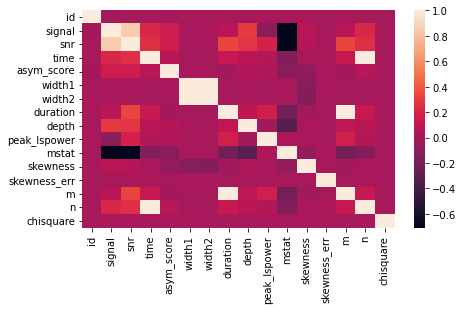

In [15]:
corr = data.corr()
sns.heatmap(corr)

---

In [16]:
data.snr = abs(data.snr)

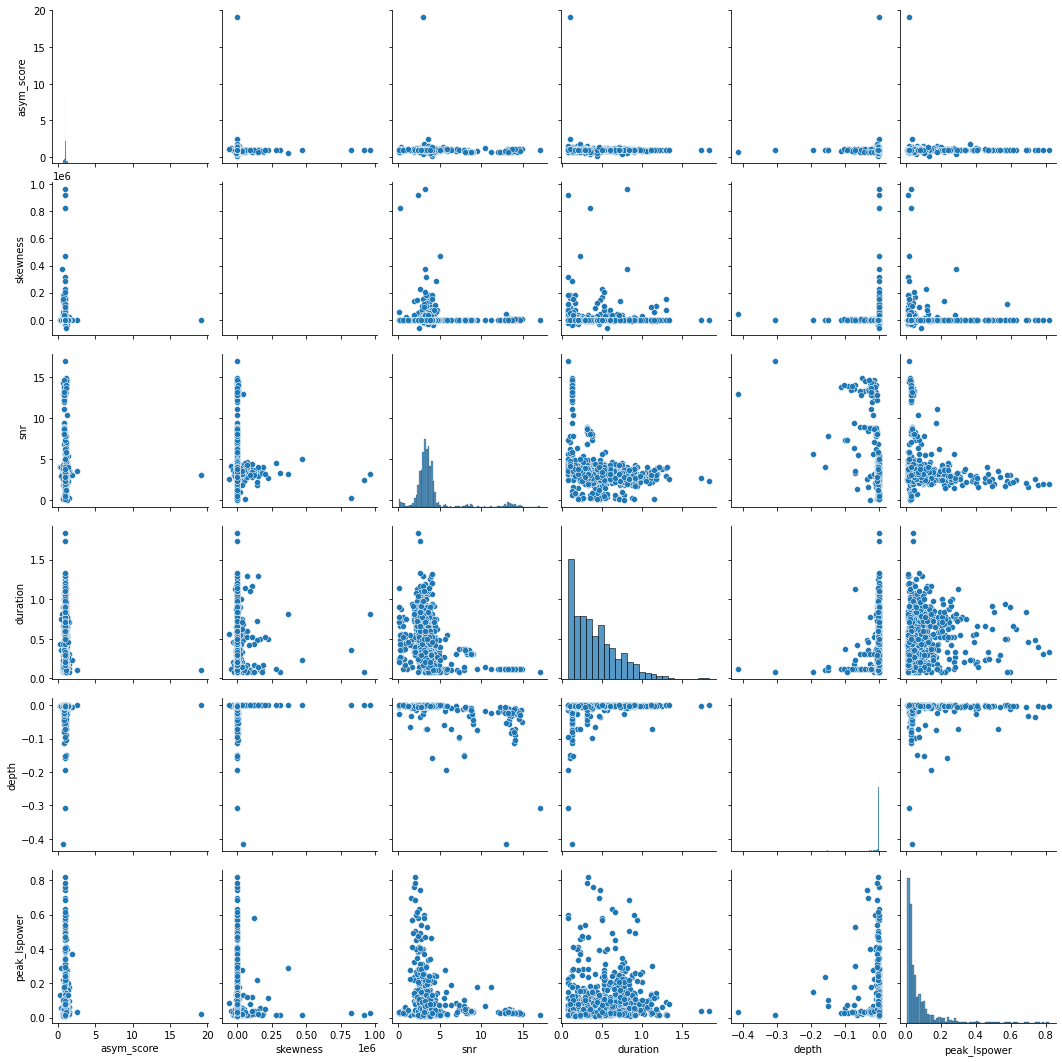

In [21]:
sns.pairplot(data.sample(n=1000),vars=['asym_score','skewness','snr','duration','depth','peak_lspower'])

---

In [18]:
data.head()

,path,id,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_err,m,n,chisquare,transit_prob
17,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,139476235,-24.317610,12.659268,1473.433193,0.758480,0.195803,0.074270,0.124998,-0.181354,0.034320,0.592,0.931154,2.113314,6,212,-161.722881,maybeTransit
18,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,100592988,-4.760106,4.631751,1471.097329,1.000006,0.073955,0.000172,0.166665,-0.000969,0.016703,0.014,-0.410028,22.109890,8,98,-41.946667,maybeTransit
20,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,33743173,-5.964502,2.821363,1486.577752,1.171146,0.589339,0.001029,0.437499,-0.001384,0.043284,0.030,33.798960,48.035262,21,843,-59.028518,maybeTransit
22,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,247676779,-20.551519,13.483104,1473.433277,1.170294,0.162159,0.001101,0.124998,-0.005375,0.020429,0.232,1597.897099,866429.520797,6,212,-14.762213,maybeTransit
23,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,37995278,-5.197294,4.474559,1475.389521,1.005005,0.074380,0.000081,0.104167,-0.000666,0.028364,-0.015,2.351523,3.565697,5,306,35.017917,maybeTransit


## Manual data visualisations

### Asymmetry and Skewness vs SNR

(-5.0, 5.0)

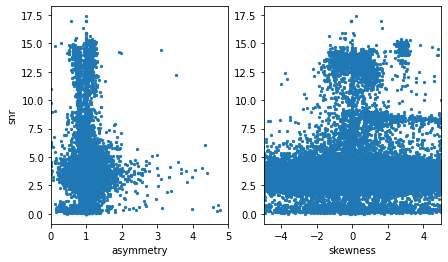

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
ax[0].set_xlim([0,5])
ax[1].set_xlim([-5,5])

The blobs top right and the line of data above SNR = 7.5 are the faulty lightcurves.

In [20]:
def plot_lightcurves(data):
    """will print raw lightcurves. You just need to make sure the data you want to see is already filtered."""
    for i in data.path.head(5):
        lc, lc_info = import_XRPlightcurve(i,sector=6)
        plt.scatter(lc['time'],normalise_flux(lc['corrected flux']),s=2)
        #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)
        plt.title(lc_info[0])
        plt.show()
    

#### Region of Asymmetry less than 0.1 and high SNR

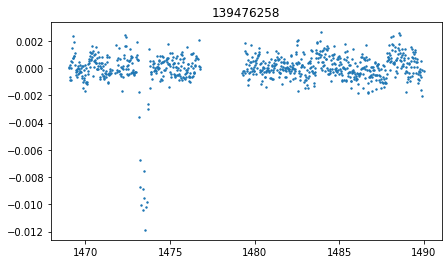

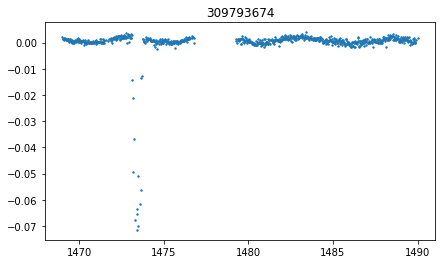

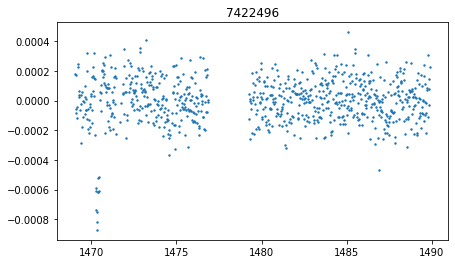

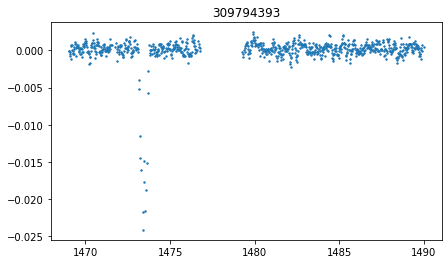

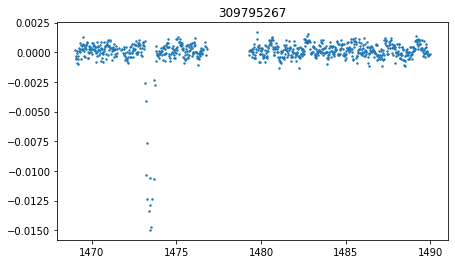

In [15]:
asym_check = data.loc[(data.skewness > 0) & (data.skewness < 4) & (abs(data.snr) >= 7.5) & (abs(data.snr) <= 10)]
plot_lightcurves(asym_check)

### Region of high SNR and skewness blobs

In [ ]:
# skew_check = data.loc[(data.skewness >=1) & (data.skewness >=1) & (abs(data.snr) >= 11)]
# for i in snr_check.path.head(5):
#     lc, lc_info = import_XRPlightcurve(i,sector=6)
#     plt.scatter(lc['time'],normalise_flux(lc['corrected flux']),s=2)
#     #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)
#     plt.title(lc_info[0])
#     plt.show()

In [ ]:
skew_check = data.loc[(data.skewness >=10) (abs(data.snr) >= 5)]
for i in snr_check.head.tail(10):
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    print(snr_check['skewness'].loc[snr_check.path == i])
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']),s=2)
    #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)
    plt.title(lc_info[0])
    plt.show()

---
### Duration and LS Power vs Depth

In [ ]:
plt.hist([data.duration,data.peak_lspower],bins=20)

(0.0, 1.0)

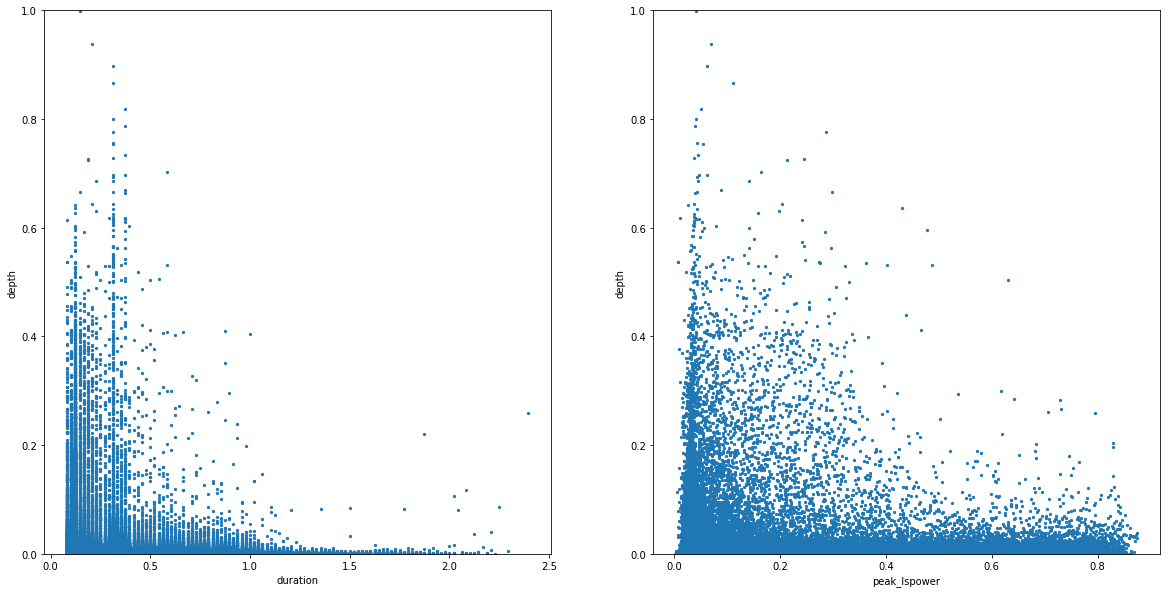

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax[0].scatter(data.duration,abs(data.depth),s=5)
ax[0].set_xlabel("duration")
ax[0].set_ylabel("depth")
ax[1].set_xlabel("peak_lspower")
ax[1].set_ylabel("depth")
ax[1].scatter(data.peak_lspower,abs(data.depth),s=5)
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])

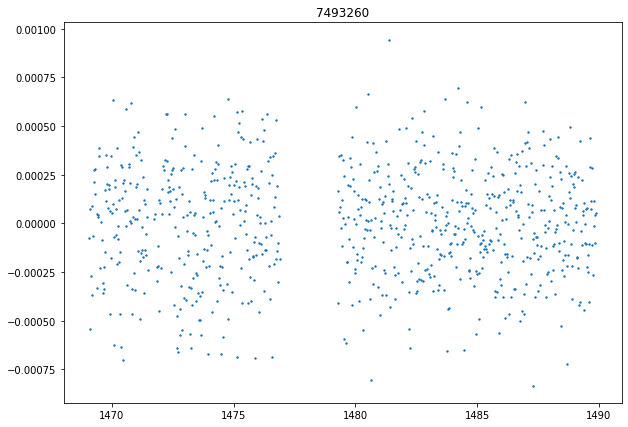

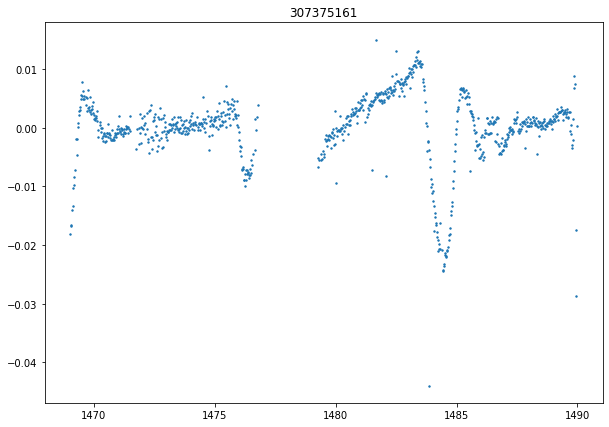

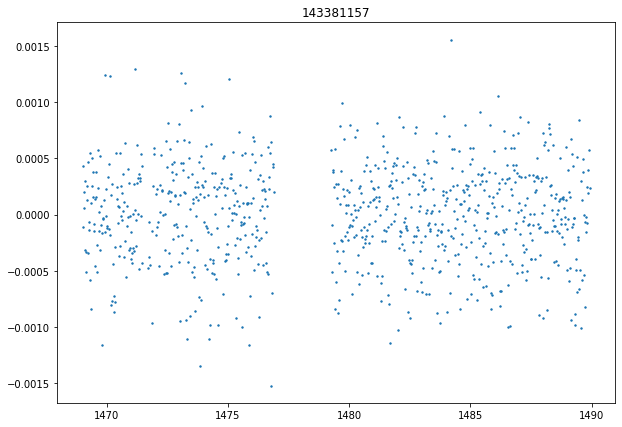

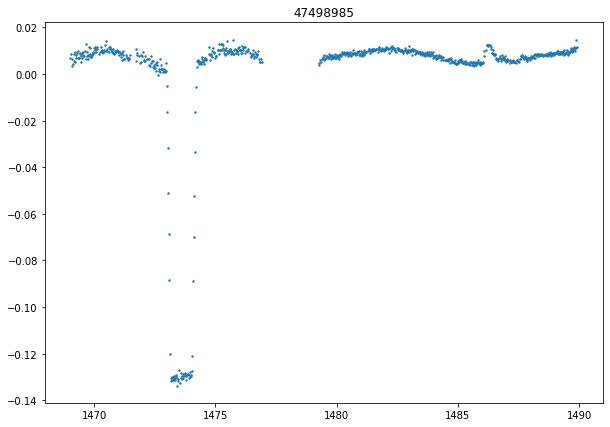

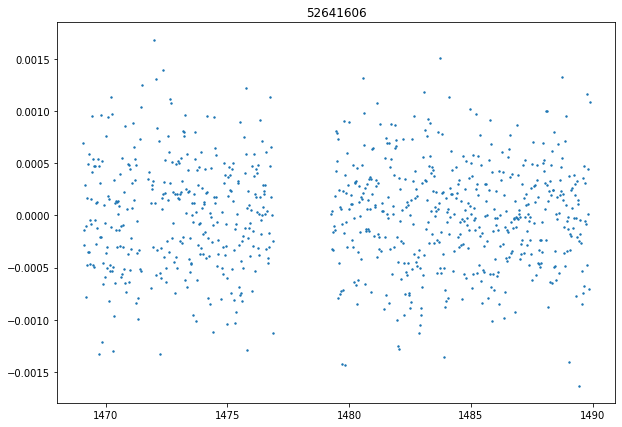

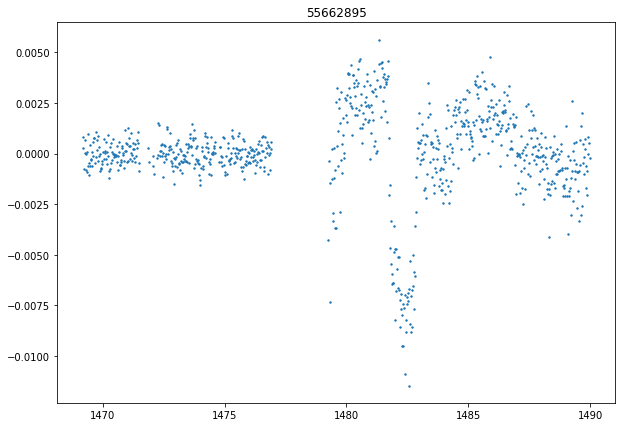

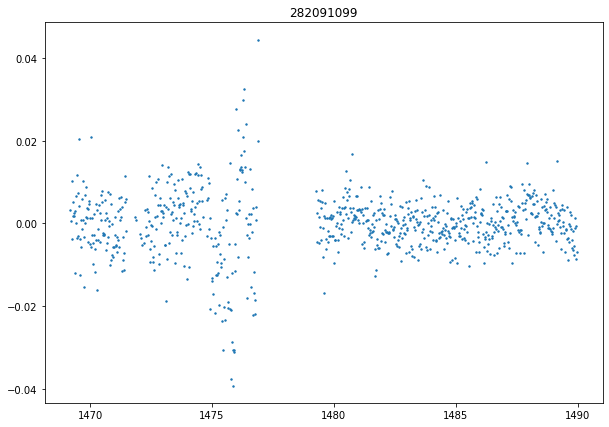

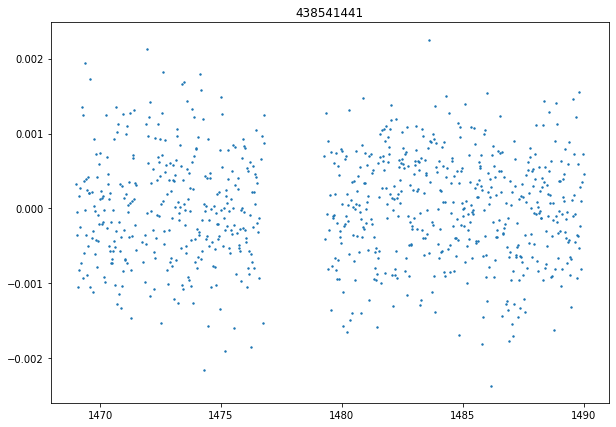

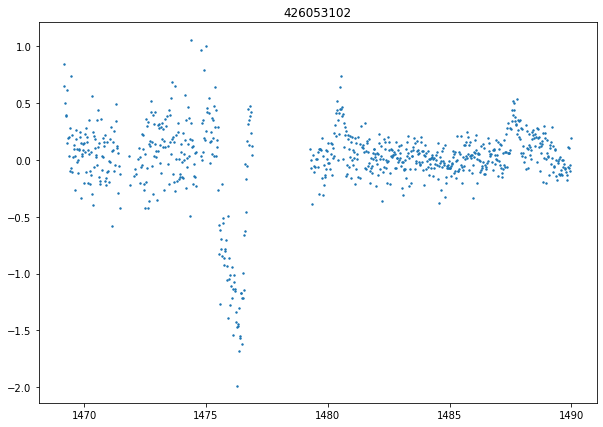

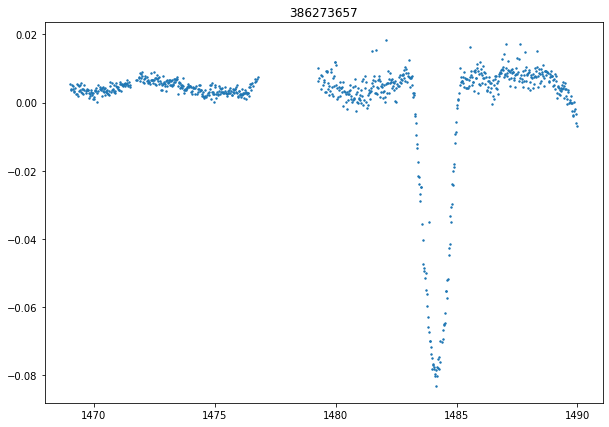

In [19]:
snr_check = data.loc[(data.duration >=0.95) & (data.asym_score <= 1.1) & (abs(data.snr) >= 5)]
for i in snr_check.path.head(10):
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']),s=2)
    #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)
    plt.title(lc_info[0])
    plt.show()

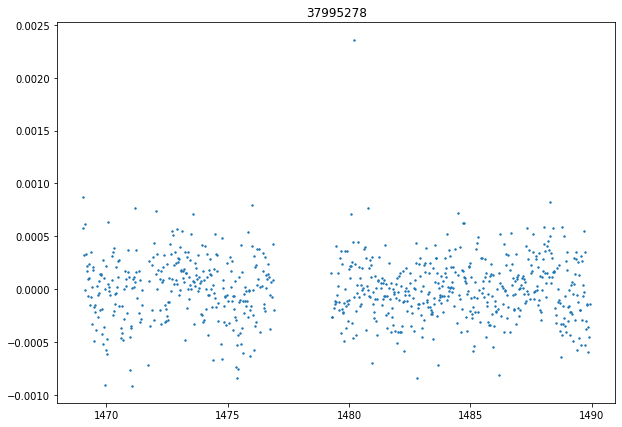

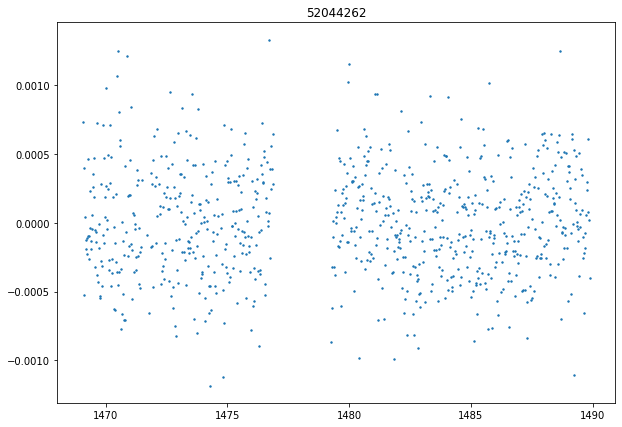

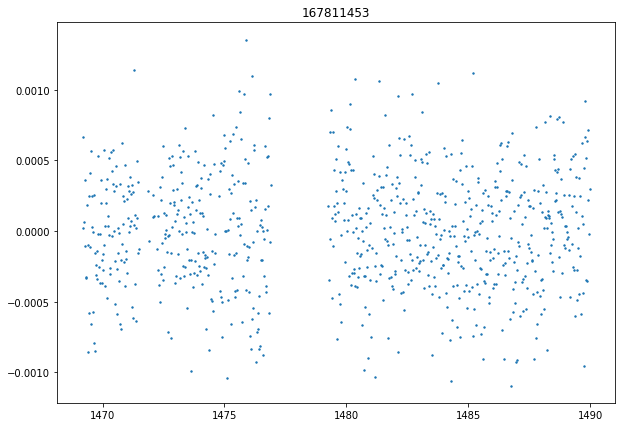

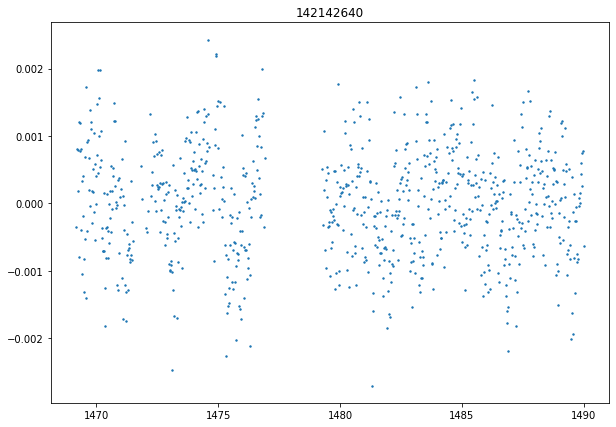

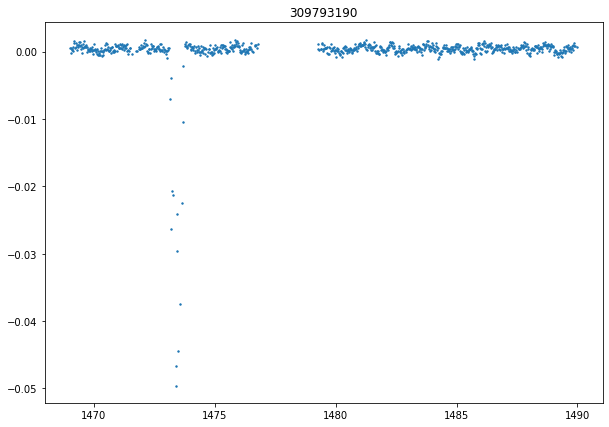

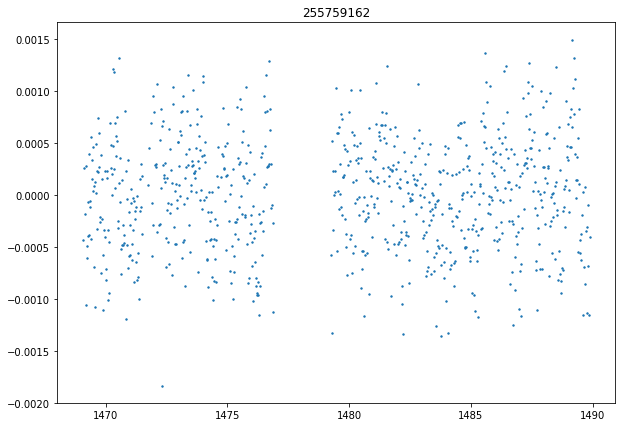

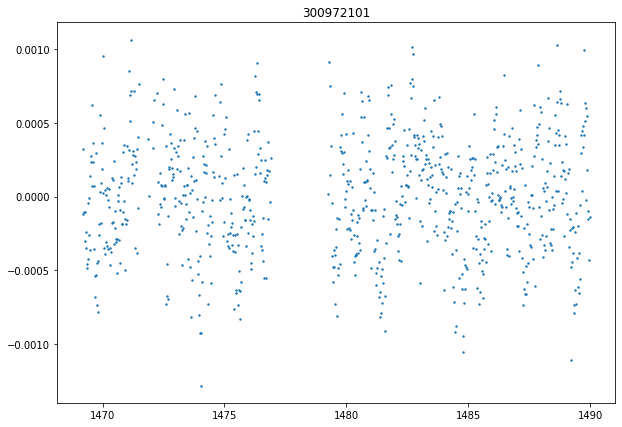

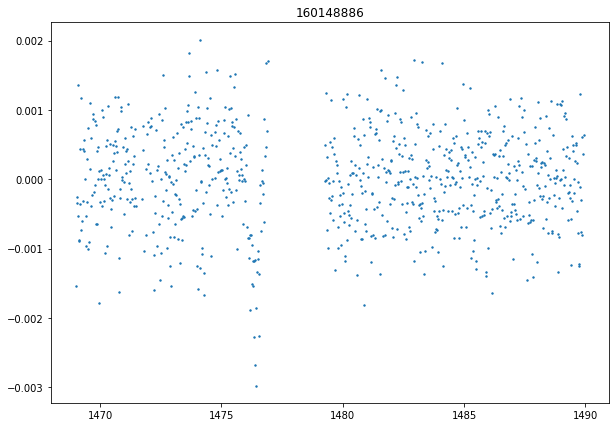

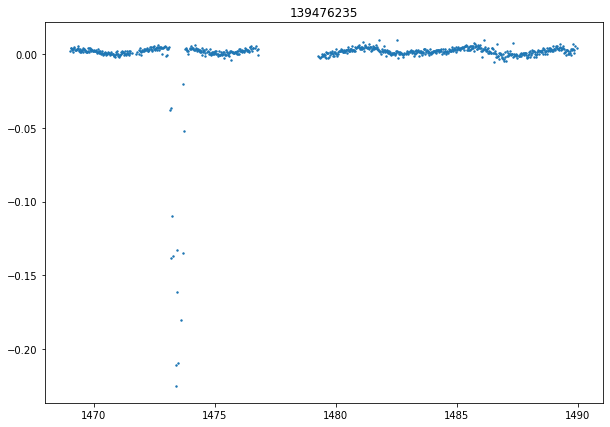

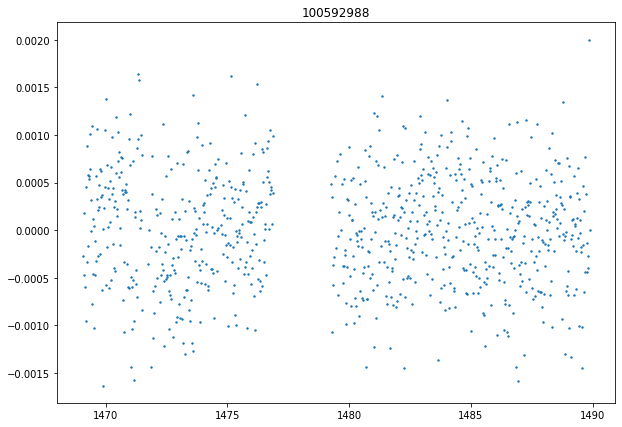

In [20]:
for i in data.path.head(10):
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']),s=2)
    #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)
    plt.title(lc_info[0])
    plt.show()

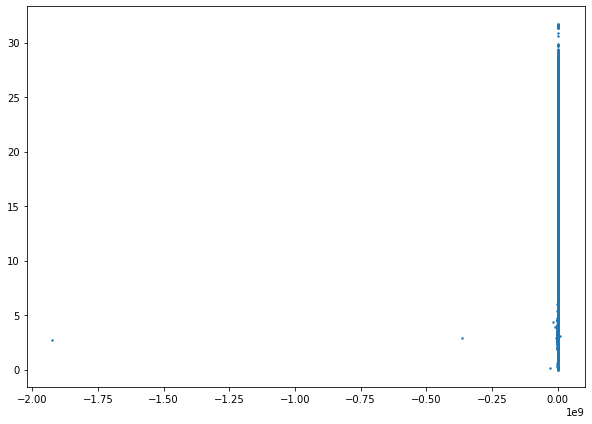

In [21]:
plt.scatter(df.skewness,abs(df.snr),s=2)

(-3.0, 3.0)

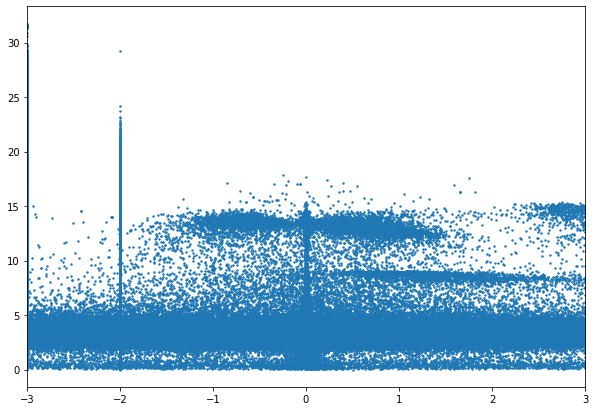

In [22]:
plt.scatter(df.skewness,abs(df.snr),s=2)
plt.xlim([-3,3])

In [23]:
a = df.loc[df.transit_prob == 'maybeTransit']

(-10.0, 10.0)

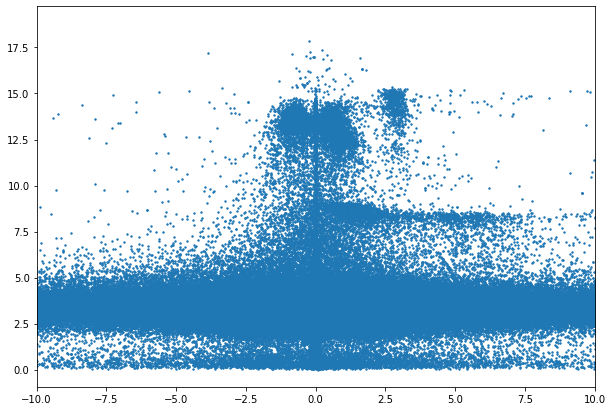

In [24]:
plt.scatter(a.skewness,abs(a.snr),s=2)
plt.xlim([-10,10])

---
### Asymmetry vs skewness

(-1.0, 3.0)

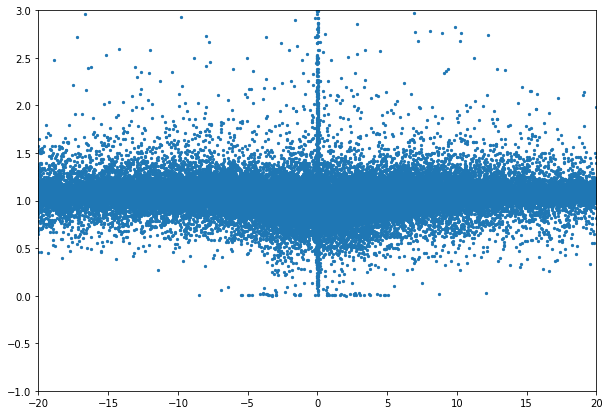

In [25]:
plt.scatter(data.skewness,data.asym_score,s=5)
plt.xlim([-20,20])
plt.ylim([-1,3])

---

## Cluster region around -1 skew

In [26]:
cut_data = df.loc[(df.skewness >= -1.5) & (df.skewness <= -0.5) & (abs(df.snr) >= 10) & (abs(df.snr) >= 10)]

In [27]:
cut_data

,path,id,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_err,m,n,chisquare,transit_prob
622,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,151110215,-22.621098,-13.638988,1473.433322,0.753452,0.175775,0.003680,0.124999,-0.011169,0.024642,0.407,-1.392980,2.197793,6,212,-14.040486,maybeTransit
712,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,151110536,-24.158957,-13.216892,1473.433324,0.779835,0.169311,0.006261,0.124999,-0.016236,0.030712,0.507,-0.611871,3.847592,6,212,-17.180945,maybeTransit
782,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,234631441,-28.851906,-14.708644,1480.578799,1.004969,0.044183,0.003479,0.104167,-0.034110,0.035098,0.428,-0.555368,0.813661,5,555,-21.714561,maybeTransit
788,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,139478157,-21.479031,-13.265825,1473.433225,0.817723,0.160908,0.003921,0.124998,-0.011336,0.027903,0.352,-0.826430,3.008498,6,212,-19.532755,maybeTransit
1051,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,309908751,-17.707809,-11.775031,1473.433230,0.826874,0.184829,0.001430,0.124998,-0.003822,0.046336,0.295,-1.058860,2.947681,6,212,-9.093457,maybeTransit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622203,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_12...,80837944,-24.799738,-13.650386,1473.433148,0.782135,0.166060,0.019480,0.124998,-0.051889,0.029224,0.512,-0.636951,3.580716,6,212,-50.566588,maybeTransit
622493,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_12...,80838991,-25.207510,-14.094174,1473.433169,0.773245,0.165339,0.018090,0.124998,-0.051681,0.027043,0.517,-0.888384,2.605515,6,212,-50.109684,maybeTransit
623350,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_7_...,156353783,-25.471842,-14.004952,1473.433150,0.790705,0.153138,0.033454,0.124998,-0.093894,0.029230,0.523,-0.524982,5.118750,6,212,-91.785404,maybeTransit
624093,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_9_...,436103686,-25.483347,-13.983328,1473.433228,0.790745,0.154792,0.035920,0.124997,-0.100501,0.027509,0.523,-0.555610,4.689907,6,212,-98.832262,maybeTransit


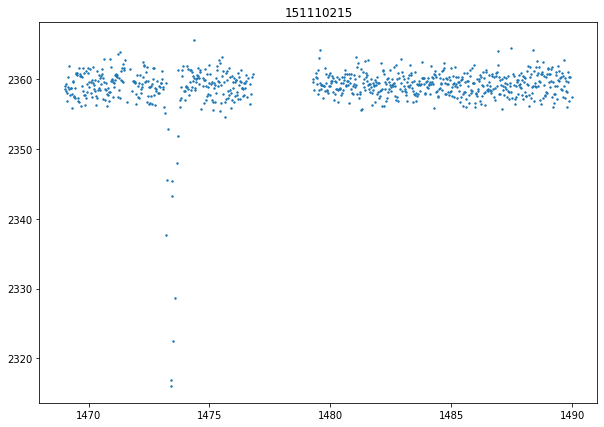

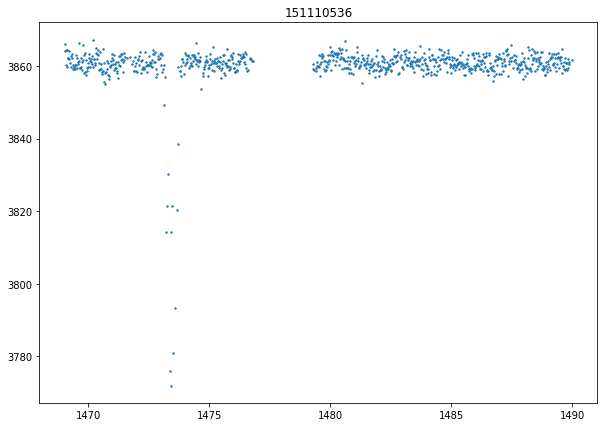

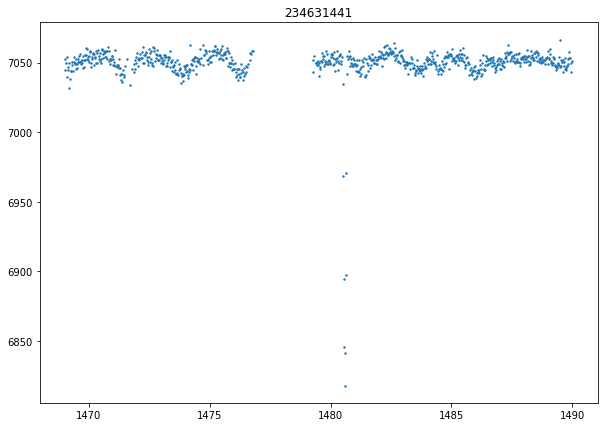

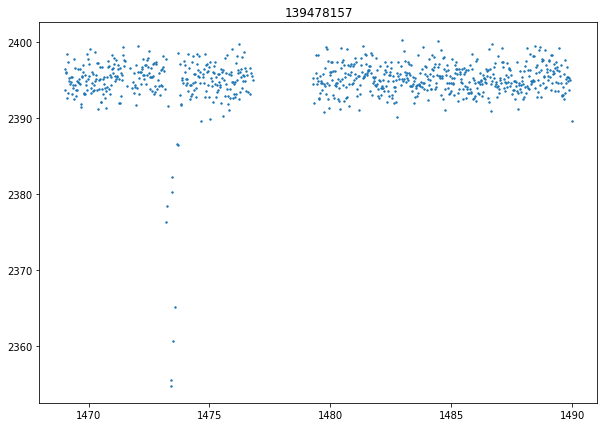

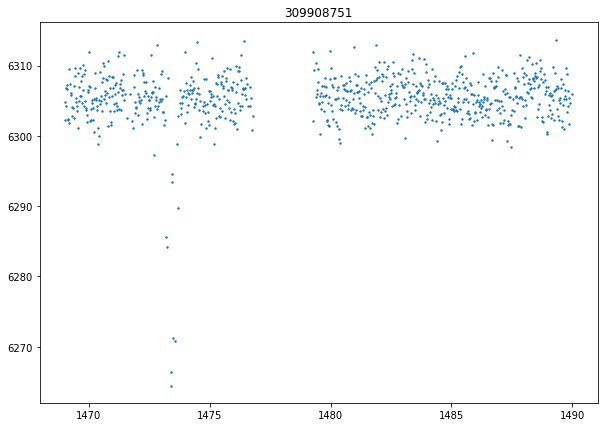

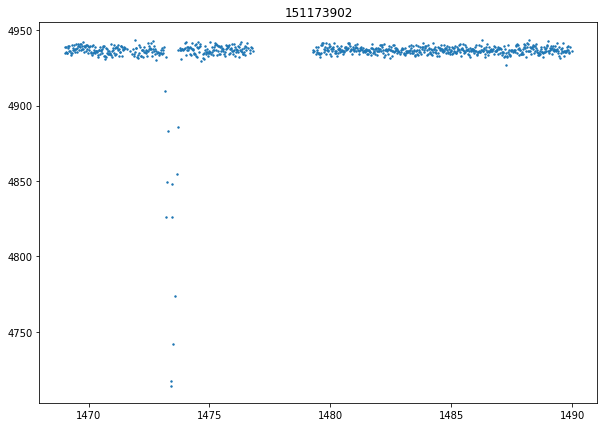

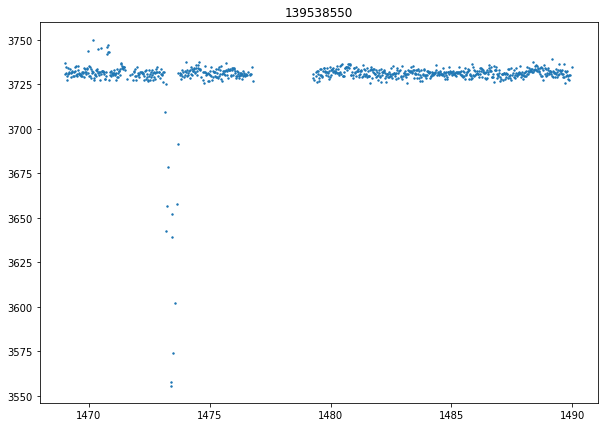

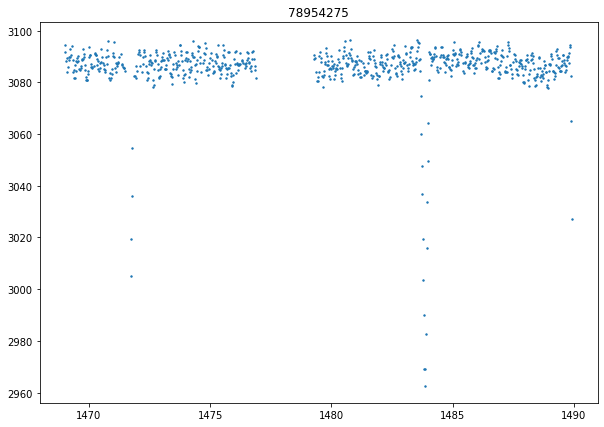

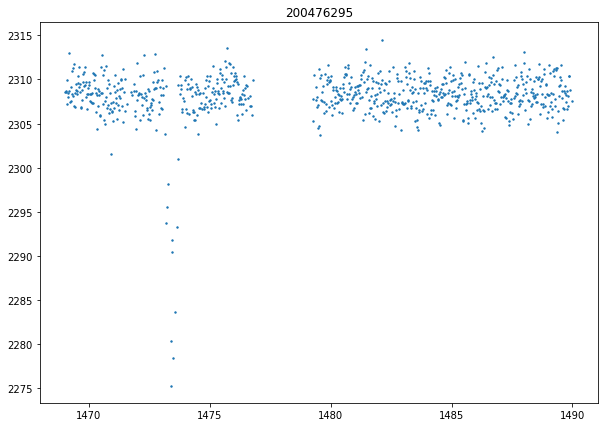

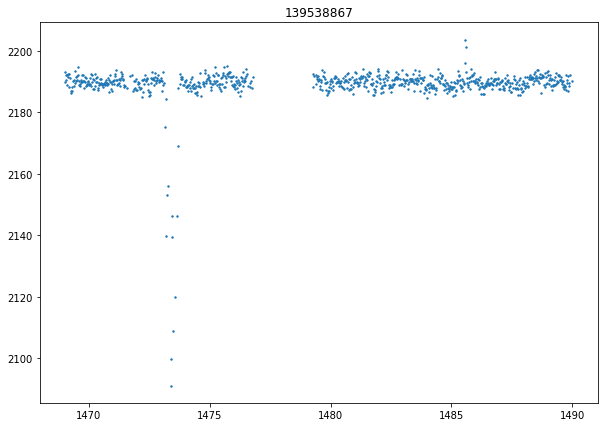

In [28]:
for i in cut_data.path.head(10):
    data, lc_info = import_XRPlightcurve(i,sector=6)
    plt.scatter(data['time'],data['corrected flux'],s=2)
    #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)
    plt.title(lc_info[0])
    plt.show()